# Simple Deep Learning

## Data Reading

In [2]:
import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()

## Preprocessing

In [3]:
from sklearn import preprocessing
from keras.utils import np_utils

scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)
x = scaler.transform(iris.data)
t = np_utils.to_categorical(iris.target)

2023-02-26 15:17:03.426940: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Traindata and Testdata

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75, random_state=0)

## Building Model

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

2023-02-26 15:25:07.018309: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training

In [6]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 3s 8ms/step - loss: 1.0668 - accuracy: 0.4018
Epoch 2/30
14/14 [==============================] - 0s 7ms/step - loss: 0.9960 - accuracy: 0.5625
Epoch 3/30
14/14 [==============================] - 0s 6ms/step - loss: 0.9366 - accuracy: 0.6964
Epoch 4/30
14/14 [==============================] - 0s 6ms/step - loss: 0.8837 - accuracy: 0.6964
Epoch 5/30
14/14 [==============================] - 0s 6ms/step - loss: 0.8343 - accuracy: 0.7232
Epoch 6/30
14/14 [==============================] - 0s 7ms/step - loss: 0.7879 - accuracy: 0.7500
Epoch 7/30
14/14 [==============================] - 0s 15ms/step - loss: 0.7434 - accuracy: 0.8214
Epoch 8/30
14/14 [==============================] - 0s 8ms/step - loss: 0.7011 - accuracy: 0.8571
Epoch 9/30
14/14 [==============================] - 0s 15ms/step - loss: 0.6608 - accuracy: 0.8571
Epoch 10/30
14/14 [==============================] - 0s 12ms/step - loss: 0.6225 - accuracy: 0.8571
Epoch 11/30
14/1

## The history object

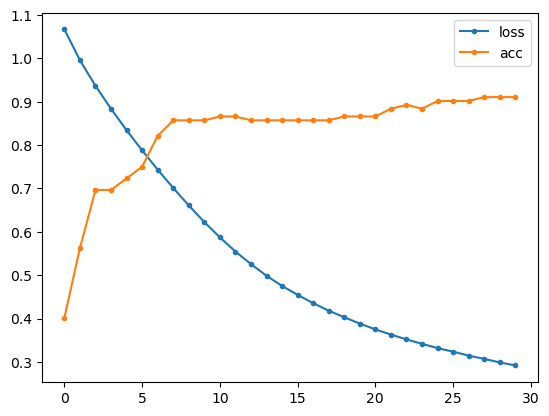

In [9]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']
hist_acc = history.history['accuracy']

plt.plot(range(len(hist_loss)), hist_loss, marker='.', label='loss')
plt.plot(range(len(hist_acc)), hist_acc, marker='.', label='acc')
plt.legend(loc='best')
plt.show()

## Evaluation

In [10]:
loss, accuracy = model.evaluate(x_test, t_test)
print('loss: ', loss)
print('accuracy: ', accuracy)

2/2 [==============================] - 1s 19ms/step - loss: 0.3783 - accuracy: 0.8158
loss:  0.3782520890235901
accuracy:  0.8157894611358643


## Prediction

In [11]:
model.predict(x_test)

2/2 [==============================] - 1s 20ms/step


array([[0.01054327, 0.122443  , 0.8670137 ],
       [0.09572724, 0.7324458 , 0.1718269 ],
       [0.9763281 , 0.01142089, 0.01225101],
       [0.01112695, 0.10312647, 0.88574654],
       [0.9578514 , 0.0226339 , 0.01951467],
       [0.00728457, 0.05797404, 0.93474144],
       [0.9650593 , 0.01794962, 0.01699108],
       [0.07723796, 0.3655974 , 0.55716467],
       [0.0640486 , 0.3776941 , 0.55825734],
       [0.12909804, 0.5623175 , 0.30858448],
       [0.06364624, 0.36875305, 0.5676007 ],
       [0.10737383, 0.41555429, 0.4770719 ],
       [0.13499999, 0.52657783, 0.3384222 ],
       [0.06620762, 0.38232204, 0.55147034],
       [0.10104261, 0.44368616, 0.45527127],
       [0.9715191 , 0.01405148, 0.01442941],
       [0.09332248, 0.43570337, 0.4709742 ],
       [0.1392045 , 0.6524418 , 0.2083537 ],
       [0.9351503 , 0.04248182, 0.02236788],
       [0.9684189 , 0.0156237 , 0.01595746],
       [0.03558153, 0.27232373, 0.6920947 ],
       [0.13972926, 0.48157832, 0.3786924 ],
       [0.

## Saving and Loading Model

In [12]:
from keras.models import load_model

model.save('iris_model.h5')
load_model('iris_model.h5')